# Botnet profiling task – 1 A4

Choose a probabilistic sequential model (Markov chain, n-grams, state machines, HMMs, …). Code for HMMs is available in many packages, or you can use our own Python code from Brightspace. For state machines you may use our code for state machine learning from https://bitbucket.org/chrshmmmr/dfasat. Use a sliding window to obtain sequence data. Learn a probabilistic sequential model from the data of one infected host and match its profile (as discussed in class) with all other hosts from the same scenario. Evaluate how many new infections your method finds and false positives it raises (as in paper 4). Can you determine what behaviour your profile detects?

In [292]:
import numpy as np
import pickle
import pandas as pd
import hmmlearn
import math
from hmmlearn import hmm
import matplotlib.pyplot as plt

In [7]:
file_path = './part4.pickle'
# pkl_file = open(file_path, 'rb')
dataset = pd.read_pickle(file_path)

In [8]:
print(dataset.head())

                Date_start         Src_IP  Code      Labels
0  2011-08-18 10:19:13.347   147.32.80.13     1  LEGITIMATE
1  2011-08-18 10:19:13.392  147.32.86.110     0  LEGITIMATE
2  2011-08-18 10:19:13.411   147.32.85.88     1  LEGITIMATE
3  2011-08-18 10:19:13.460   147.32.84.59     1  LEGITIMATE
4  2011-08-18 10:19:13.486   147.32.84.59     0  LEGITIMATE


In [9]:
code_sample = np.unique(dataset['Code'])

In [11]:
all_ip = np.unique(dataset['Src_IP'])

In [14]:
# source IP
botnet_ips = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
             '147.32.84.205','147.32.84.206','147.32.84.207','147.32.84.208','147.32.84.209']

normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36',
              '147.32.80.9']

In [15]:
# choose the first infected IP
df_infected = dataset[dataset['Src_IP'] == '147.32.84.165']

In [339]:
###### normal sliding window
def slide_win(new_dataset, win_size):
    win_data = []
    all_ran = int(new_dataset.shape[0] // win_size + 1)
    for i in range(all_ran):
        idx = i * win_size
        if idx + win_size <= new_dataset.shape[0]:
            ran = new_dataset.index.values[idx: idx + win_size]
            win_data.append(new_dataset.loc[ran,:])
        else:
            ran = new_dataset.index.values[idx:]
            win_data.append(new_dataset.loc[ran,:])
    return win_data

In [354]:
win_size = 4
win_infected = slide_win(df_infected, win_size)

In [355]:
def get_win_data(win_infected, win_size):    
    X = []
    for i in range(len(win_infected)):
        win_infected[i].reset_index(drop = True, inplace = True)
        x = []
        for item in win_infected[i]['Code']:
            x.append(int(item))
        X.append(x)
    # if the last item is shorter than the window size, delete it.
    if len(X[-1]) != win_size:
        del X[-1]
    return X

In [356]:
n_states = 10
X = get_win_data(win_infected, win_size)

In [357]:
model = hmm.GaussianHMM(n_components=n_states, n_iter=1000, tol=0.01)
X = np.array(X)
model.fit(X)
print(model.startprob_)
print(model.transmat_)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWa

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   2.76444096e-51]
[[  9.97067449e-001   2.09467936e-004   0.00000000e+000   6.28403854e-004
    1.46627566e-003   4.18935457e-004   2.46631124e-313   0.00000000e+000
    1.04396859e-187   2.09468412e-004]
 [  0.00000000e+000   9.13580248e-001   0.00000000e+000   1.23456846e-002
    0.00000000e+000   2.46902049e-002   1.23456790e-002   0.00000000e+000
    3.70381832e-002   1.68629335e-043]
 [  0.00000000e+000   1.69491525e-002   7.28813559e-001   3.36685372e-002
    0.00000000e+000   5.08067543e-002   6.75936376e-002   5.08474575e-002
    9.74092436e-208   5.13209017e-002]
 [  4.46684102e-001   3.76457037e-042   4.45170379e-001   1.36376169e-043
    0.00000000e+000   1.08145519e-001   1.46882142e-058   0.00000000e+000
    7.14121094e-102   1.69348832e-027]
 [  1.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [358]:
infected_result = []
for item in botnet_ips:
    df_test = dataset[dataset['Src_IP'] == item]
    test_infected = slide_win(df_test, win_size)
    test_X = get_win_data(test_infected, win_size)
    infected_result.append([item, model.score(test_X)/len(test_X)])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:459: RuntimeWarning: divide by zero encountered in log
  np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is d

In [359]:
normal_result = []
for item in normal_ips:
    df_test = dataset[dataset['Src_IP'] == item]
    test_infected = slide_win(df_test, win_size)
    test_X = get_win_data(test_infected, win_size)
    prob, seq = model.decode(test_X)
    normal_result.append([item, prob/len(test_X)])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:451: RuntimeWarning: divide by zero encountered in log
  n_samples, n_components, np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:452: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_), framelogprob)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Functi

In [360]:
infected_result

[['147.32.84.165', 21.920610758876116],
 ['147.32.84.191', 21.867834815417709],
 ['147.32.84.192', 22.000896074335106],
 ['147.32.84.193', 21.923552244837232],
 ['147.32.84.204', 21.967075940506241],
 ['147.32.84.205', 21.920400918112904],
 ['147.32.84.206', 22.019029506192862],
 ['147.32.84.207', 21.992094683670075],
 ['147.32.84.208', 21.92840133051153],
 ['147.32.84.209', 21.947276437251528]]

In [361]:
normal_result

[['147.32.84.170', -7.500091827460975],
 ['147.32.84.134', 2.1144189129059376],
 ['147.32.84.164', -8.914209235565886],
 ['147.32.87.36', -13.777917163068112],
 ['147.32.80.9', -38.34872080656854]]

In [362]:
# set a threshold for likelihood
# 0 may be suitable
threshold = 0

In [363]:
result = []
for item in all_ip:
    if (item in botnet_ips) or (item in normal_ips):
        pass
    else:
        df_test = dataset[dataset['Src_IP'] == item]
        if len(df_test) < win_size:
            pass
        else:
            test_infected = slide_win(df_test, win_size)
            test_X = get_win_data(test_infected, win_size)
            prob, seq = model.decode(test_X)
            result.append([item, prob/len(test_X), 
                           (prob/len(test_X)) > threshold])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:451: RuntimeWarning: divide by zero encountered in log
  n_samples, n_components, np.log(self.startprob_),
/usr/local/lib/python3.5/dist-packages/hmmlearn/base.py:452: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_), framelogprob)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Functi

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_

In [364]:
true_label = []
for item in all_ip:
    if (item in botnet_ips) or (item in normal_ips):
        pass
    else:
        df_test = dataset[dataset['Src_IP'] == item]
        if len(df_test) < win_size:
            pass
        else:
            label = []
            for obj in df_test['Labels']:
                label.append(obj)
            true_label.append([item, ('Botnet' in label)])

In [365]:
TP = 0
FP = 0
TN = 0
FN = 0
detected = []
not_detected =[]
for i in range(len(result)):
    if result[i][2] == True and true_label[i][1] == True:
        TP = TP + 1
        detected.append(result[i][0])
    elif result[i][2] == True and true_label[i][1] == False:
        FP = FP + 1
        
    elif result[i][2] == False and true_label[i][1] == False:
        TN = TN + 1
    elif result[i][2] == False and true_label[i][1] == True:
        
        FN = FN + 1
        not_detected.append(result[i][0])
print(TP,FP,TN,FN)        

15 66 264 19


In [372]:
detected_data = []
for item in detected:
    df_test = dataset[dataset['Src_IP'] == item]
    detected_data.append(df_test['Code'])
    print(df_test)

                     Date_start         Src_IP  Code      Labels
397358  2011-08-18 13:00:47.854  121.11.80.162     0      Botnet
397359  2011-08-18 13:00:47.861  121.11.80.162     0      Botnet
397361  2011-08-18 13:00:47.868  121.11.80.162     0      Botnet
397362  2011-08-18 13:00:47.868  121.11.80.162     0      Botnet
397363  2011-08-18 13:00:47.868  121.11.80.162     0      Botnet
397364  2011-08-18 13:00:47.869  121.11.80.162     0      Botnet
397365  2011-08-18 13:00:47.869  121.11.80.162     0      Botnet
397366  2011-08-18 13:00:47.871  121.11.80.162     0      Botnet
397367  2011-08-18 13:00:47.880  121.11.80.162     0  LEGITIMATE
397369  2011-08-18 13:00:47.880  121.11.80.162     0      Botnet
397370  2011-08-18 13:00:47.881  121.11.80.162     0      Botnet
                     Date_start          Src_IP  Code  Labels
627120  2011-08-18 15:02:37.875  130.239.18.172     0  Botnet
627136  2011-08-18 15:02:38.024  130.239.18.172     0  Botnet
628332  2011-08-18 15:02:47.020  1

                     Date_start          Src_IP  Code      Labels
12987   2011-08-18 10:32:11.675  74.125.232.194     1  LEGITIMATE
13761   2011-08-18 10:32:56.811  74.125.232.194     0  LEGITIMATE
14440   2011-08-18 10:33:41.932  74.125.232.194     0  LEGITIMATE
15381   2011-08-18 10:34:27.052  74.125.232.194     0  LEGITIMATE
16201   2011-08-18 10:35:12.172  74.125.232.194     0  LEGITIMATE
16726   2011-08-18 10:35:57.293  74.125.232.194     0  LEGITIMATE
16926   2011-08-18 10:36:11.703  74.125.232.194     0  LEGITIMATE
81670   2011-08-18 11:34:45.166  74.125.232.194     1  LEGITIMATE
82535   2011-08-18 11:35:30.386  74.125.232.194     0  LEGITIMATE
83259   2011-08-18 11:36:15.407  74.125.232.194     0  LEGITIMATE
84325   2011-08-18 11:37:00.527  74.125.232.194     0  LEGITIMATE
85172   2011-08-18 11:37:45.648  74.125.232.194     0  LEGITIMATE
86014   2011-08-18 11:38:30.768  74.125.232.194     0  LEGITIMATE
86228   2011-08-18 11:38:45.388  74.125.232.194     0  LEGITIMATE
120588  20

                     Date_start        Src_IP  Code  Labels
46553   2011-08-18 11:04:35.427  89.16.176.16     1  Botnet
46554   2011-08-18 11:04:35.461  89.16.176.16     0  Botnet
47433   2011-08-18 11:05:06.337  89.16.176.16     0  Botnet
48112   2011-08-18 11:05:36.089  89.16.176.16     0  Botnet
48722   2011-08-18 11:06:01.092  89.16.176.16     0  Botnet
49307   2011-08-18 11:06:29.407  89.16.176.16     0  Botnet
49487   2011-08-18 11:06:41.255  89.16.176.16     0  Botnet
49790   2011-08-18 11:06:51.133  89.16.176.16     0  Botnet
50415   2011-08-18 11:07:11.420  89.16.176.16     0  Botnet
50708   2011-08-18 11:07:30.904  89.16.176.16     1  Botnet
50710   2011-08-18 11:07:30.938  89.16.176.16     0  Botnet
50898   2011-08-18 11:07:34.256  89.16.176.16     0  Botnet
51448   2011-08-18 11:08:05.422  89.16.176.16     1  Botnet
51449   2011-08-18 11:08:05.422  89.16.176.16     1  Botnet
51904   2011-08-18 11:08:23.401  89.16.176.16     1  Botnet
51905   2011-08-18 11:08:23.401  89.16.1

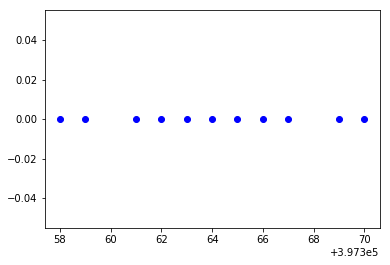

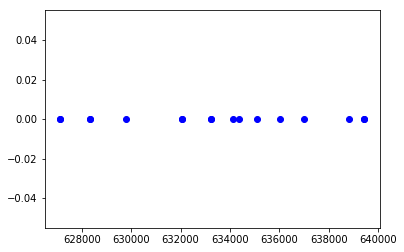

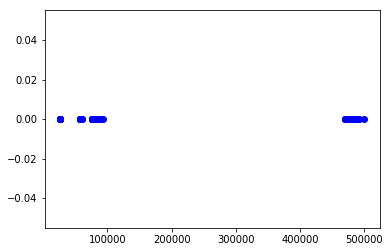

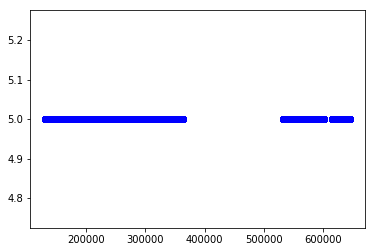

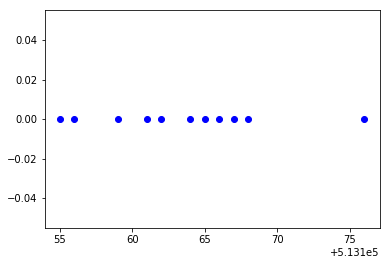

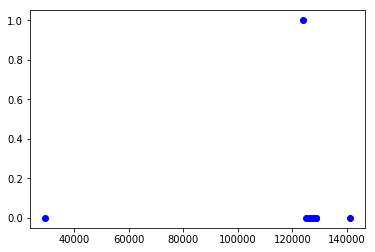

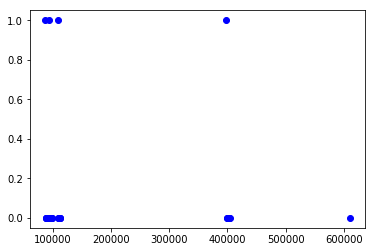

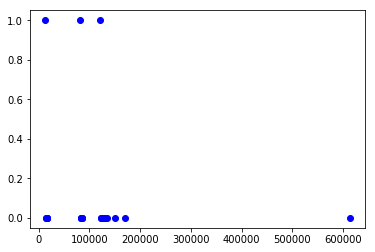

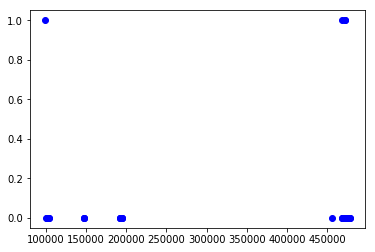

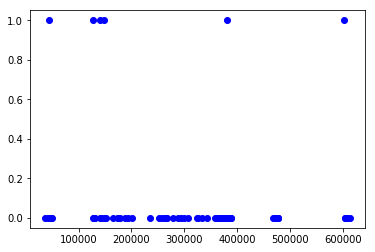

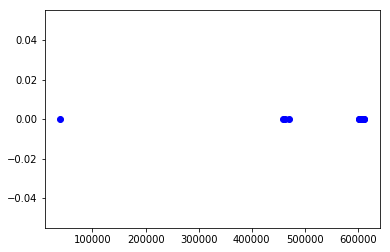

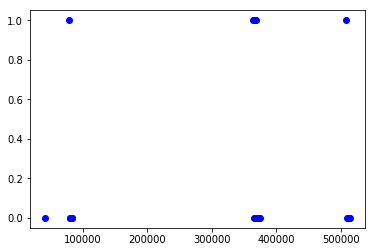

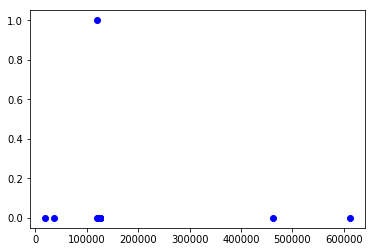

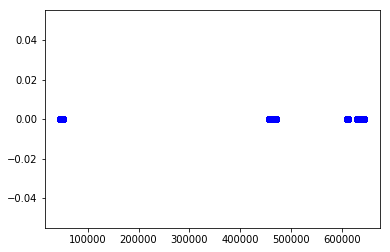

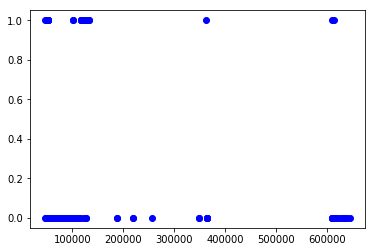

In [367]:
for item in detected_data:
    plt.figure()
    plt.plot(item, 'bo')
    plt.show()

In [373]:
not_detected_data = []
for item in not_detected:
    df_test = dataset[dataset['Src_IP'] == item]
    print(df_test)
    not_detected_data.append(df_test['Code'])

                     Date_start          Src_IP  Code  Labels
612885  2011-08-18 14:59:15.502  174.143.119.91     0  Botnet
612890  2011-08-18 14:59:15.648  174.143.119.91     0  Botnet
613228  2011-08-18 14:59:24.645  174.143.119.91     0  Botnet
613234  2011-08-18 14:59:24.926  174.143.119.91     1  Botnet
614668  2011-08-18 15:00:29.949  174.143.119.91     1  Botnet
615463  2011-08-18 15:01:03.087  174.143.119.91     0  Botnet
616675  2011-08-18 15:01:12.204  174.143.119.91     0  Botnet
618048  2011-08-18 15:01:21.932  174.143.119.91     0  Botnet
620661  2011-08-18 15:01:41.389  174.143.119.91     0  Botnet
624821  2011-08-18 15:02:20.300  174.143.119.91     0  Botnet
634211  2011-08-18 15:03:38.124  174.143.119.91     0  Botnet
                    Date_start          Src_IP  Code  Labels
46318  2011-08-18 11:04:21.209  195.113.232.75     1  Botnet
68151  2011-08-18 11:19:59.553  195.113.232.75     1  Botnet
69224  2011-08-18 11:21:16.831  195.113.232.75     1  Botnet
69895  2011-

                     Date_start           Src_IP  Code  Labels
469049  2011-08-18 13:52:33.108  216.155.130.130     0  Botnet
469054  2011-08-18 13:52:33.218  216.155.130.130     0  Botnet
469206  2011-08-18 13:52:39.417  216.155.130.130     0  Botnet
469287  2011-08-18 13:52:42.826  216.155.130.130     1  Botnet
469936  2011-08-18 13:52:55.229  216.155.130.130     0  Botnet
471921  2011-08-18 13:53:46.819  216.155.130.130     1  Botnet
475119  2011-08-18 13:55:58.224  216.155.130.130     0  Botnet
476692  2011-08-18 13:57:08.181  216.155.130.130     1  Botnet
479445  2011-08-18 13:58:58.285  216.155.130.130     1  Botnet
482134  2011-08-18 14:01:20.198  216.155.130.130     0  Botnet
484641  2011-08-18 14:03:38.187  216.155.130.130     0  Botnet
487197  2011-08-18 14:05:56.176  216.155.130.130     0  Botnet
487794  2011-08-18 14:06:25.364  216.155.130.130     1  Botnet
489234  2011-08-18 14:07:34.648  216.155.130.130     1  Botnet
491693  2011-08-18 14:09:21.271  216.155.130.130     1 

                     Date_start          Src_IP  Code      Labels
120559  2011-08-18 12:10:11.300  74.125.232.207     1  LEGITIMATE
120560  2011-08-18 12:10:11.300  74.125.232.207     0  LEGITIMATE
120975  2011-08-18 12:10:20.958  74.125.232.207     0  LEGITIMATE
121340  2011-08-18 12:10:30.722  74.125.232.207     0  LEGITIMATE
121627  2011-08-18 12:10:40.723  74.125.232.207     0  LEGITIMATE
121938  2011-08-18 12:10:56.617  74.125.232.207     0  LEGITIMATE
123065  2011-08-18 12:11:41.667  74.125.232.207     0  LEGITIMATE
123987  2011-08-18 12:12:23.858  74.125.232.207     1  LEGITIMATE
124121  2011-08-18 12:12:26.788  74.125.232.207     0  LEGITIMATE
125125  2011-08-18 12:13:11.908  74.125.232.207     0  LEGITIMATE
126041  2011-08-18 12:13:57.029  74.125.232.207     0  LEGITIMATE
126335  2011-08-18 12:14:11.612  74.125.232.207     0  LEGITIMATE
126491  2011-08-18 12:14:20.740  74.125.232.207     0  LEGITIMATE
147684  2011-08-18 12:19:47.052  74.125.232.207     1  LEGITIMATE
147685  20

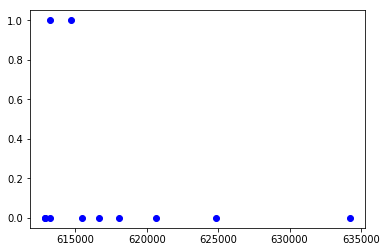

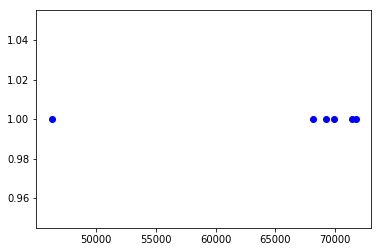

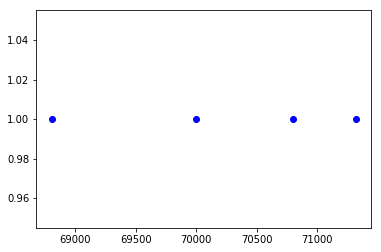

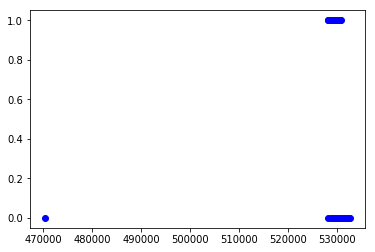

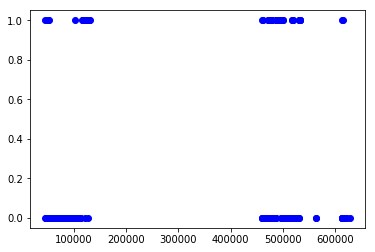

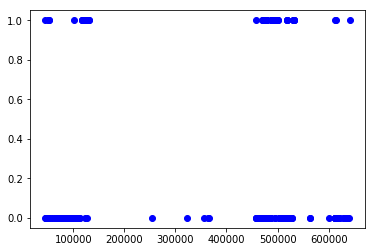

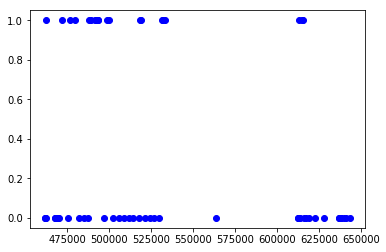

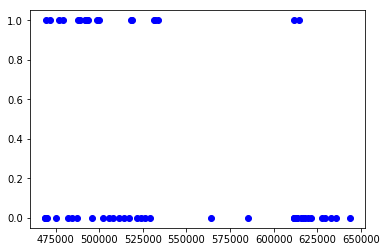

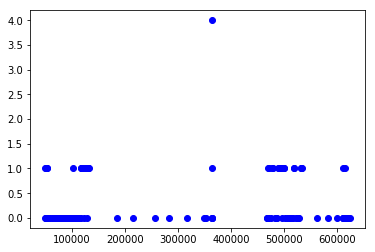

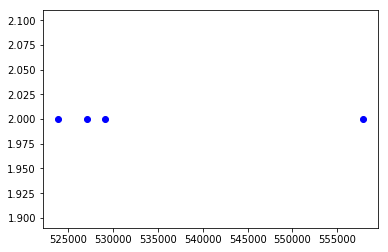

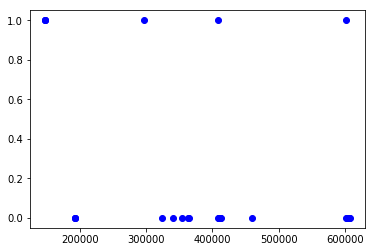

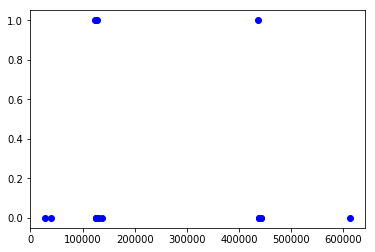

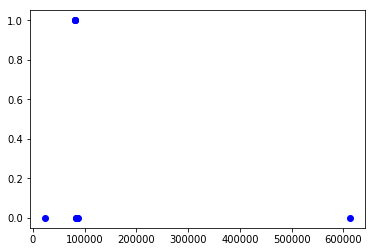

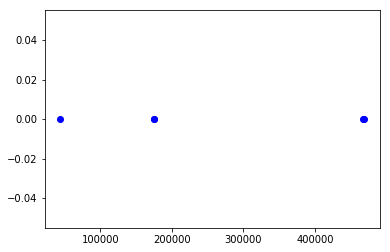

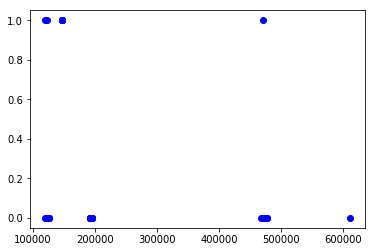

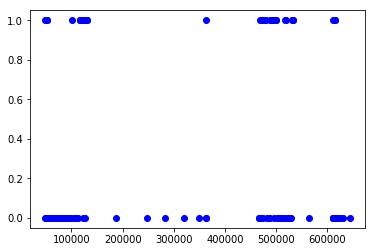

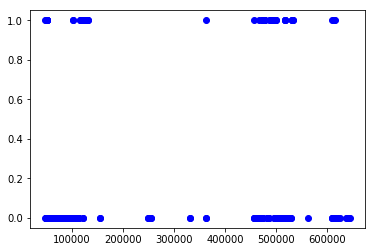

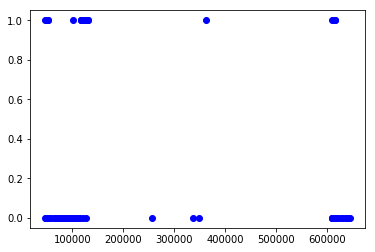

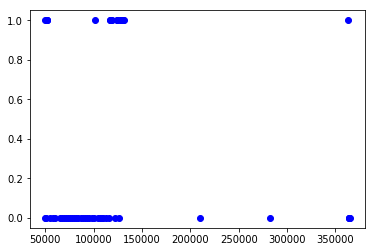

In [369]:
for item in not_detected_data:
    plt.figure()
    plt.plot(item, 'bo')
    plt.show()